In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

Prior Information: there are two star clusters.

In [50]:
df=pd.read_csv("star_clusters.csv")
df.drop("Unnamed: 0",inplace=True,axis=1)
df.head()

,parallax,phot_g_mean_mag,bp_rp
0,1.095887,14.447882,0.835868
1,1.141702,13.718393,0.842082
2,1.130219,14.149156,0.786826
3,1.168392,14.359411,0.968462
4,1.128273,12.562445,0.712632


In [68]:
df.isna().sum()

parallax           0
phot_g_mean_mag    0
bp_rp              0
dtype: int64

In [52]:
cor=df.corr()

<Axes: >

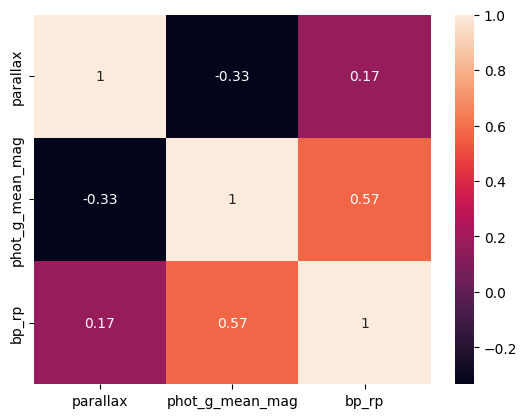

In [55]:
sns.heatmap(cor,annot=True)

In [33]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

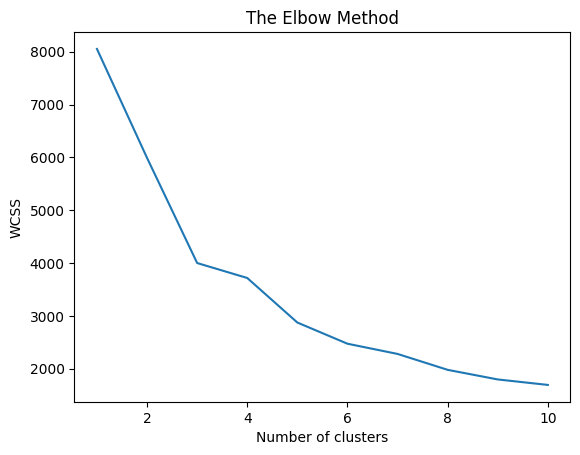

In [56]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

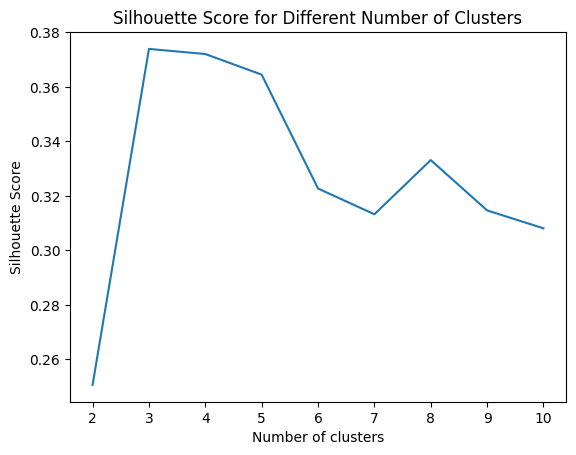

In [74]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [75]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [64]:
# Apply Agglomerative Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(scaled_data)

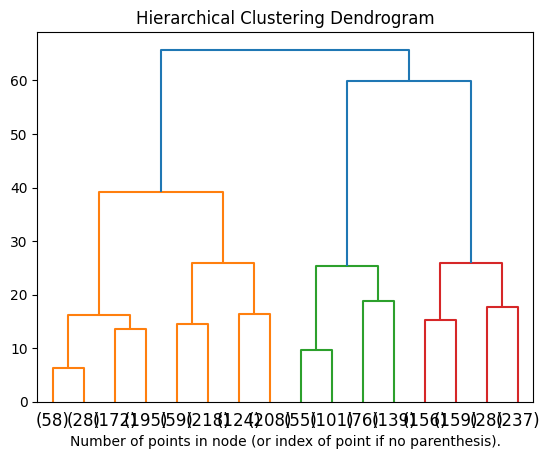

In [67]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = scaled_data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [59]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_data)

Text(0, 0.5, 'Phot G Mean Mag')

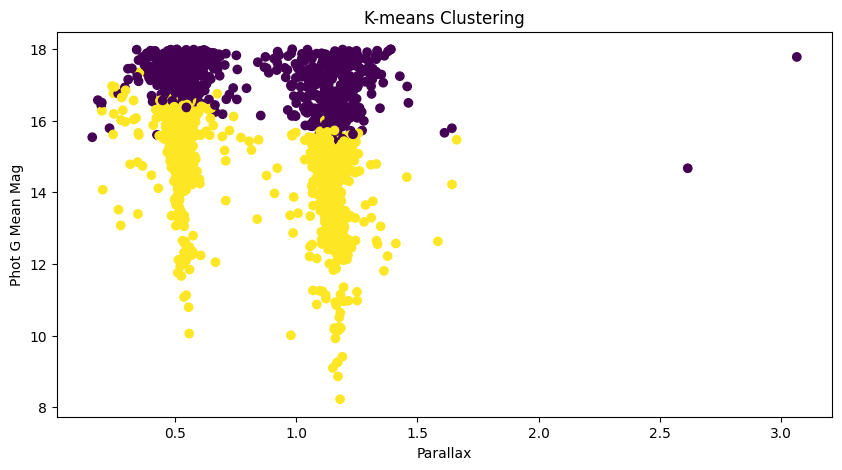

In [76]:
# Plotting the clusters
plt.figure(figsize=(10, 5))

# Plot K-means clusters

plt.scatter(df['parallax'], df['phot_g_mean_mag'], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Parallax')
plt.ylabel('Phot G Mean Mag')

Text(0, 0.5, 'Phot G Mean Mag')

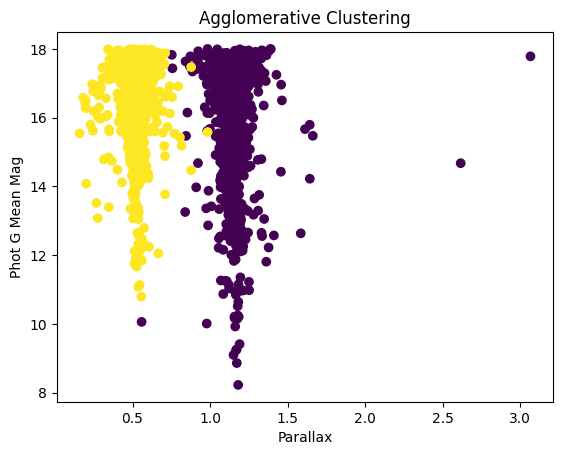

In [65]:
# Plot Agglomerative Hierarchical clusters
plt.scatter(df['parallax'], df['phot_g_mean_mag'], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Parallax')
plt.ylabel('Phot G Mean Mag')

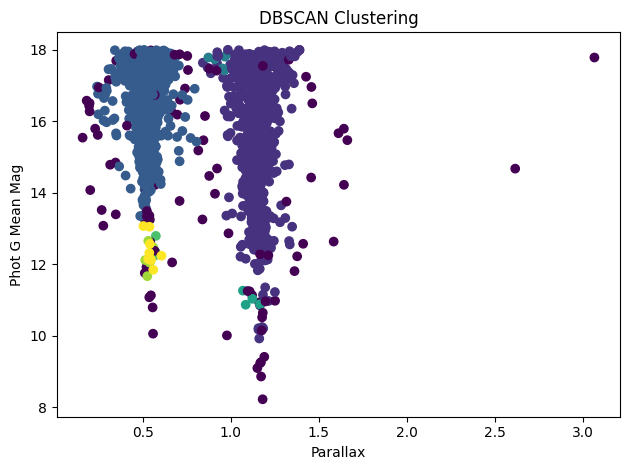

In [63]:
# Plot DBSCAN clusters

plt.scatter(df['parallax'], df['phot_g_mean_mag'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Parallax')
plt.ylabel('Phot G Mean Mag')

plt.tight_layout()
plt.show()